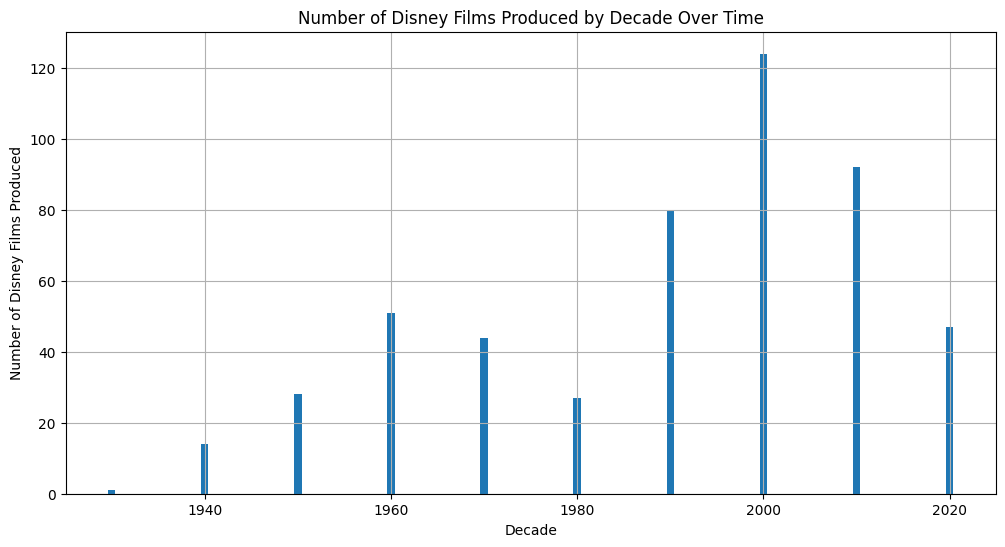

In [2]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt

# Defining URL
wiki_url = "https://en.wikipedia.org/wiki/List_of_Walt_Disney_Pictures_films"
response = requests.get(wiki_url)

# uses BeautifulSoup to parse thru the website
soup = BeautifulSoup(response.text, "html.parser")

# uses BS to find all tables within the Wiki PaGe
all_tables = soup.find_all("table", {"class": "wikitable"})

# Initialize list
data_list = []

# Loop through each table
for table in all_tables:
    for row in table.find_all("tr")[1:]:  # Skip the header row
        columns = row.find_all(["td", "th"])
        if columns:
            row_data = [column.get_text(strip=True) for column in columns]
            data_list.append(row_data)

# Creates DataFrame to store  data
data = pd.DataFrame(data_list)

# Rename columns
data.columns = ["Title", "U.S. release date", "Notes", "", ""]

# Remove rows with missing U.S. release date
data = data[data["U.S. release date"].str.strip() != ""]

# Converts "U.S. release date" to datetime -- we are looking for a certain format so we can extract just the year
data["U.S. release date"] = pd.to_datetime(data["U.S. release date"], errors="coerce")

# Extract the release year
data["Release Year"] = data["U.S. release date"].dt.year

#Cluster by Decade
data["Decade"] = (data["Release Year"] // 10) * 10

# Create a graph shows # of films produced by Disney by decade over time
film_counts_by_decade = data.groupby("Decade").size()

# Plot data
plt.figure(figsize=(12, 6))
plt.bar(film_counts_by_decade.index, film_counts_by_decade.values)
plt.xlabel("Decade")
plt.ylabel("Number of Disney Films Produced")
plt.title("Number of Disney Films Produced by Decade Over Time")
plt.grid(True)

# Save data to CSV file named "DisneyFilms.csv"
data.to_csv("DisneyFilms.csv", index=False)

# Print plot
plt.show()